In [1]:
"""
Author Sadia Sami
Dated : 24-Dec-18
We have downsampled twice and upsampled twice in this AE model.
Our train set is original avito dataset images
Our test is of images we get processed from weiner filter
Objective : We aimed to reconstruct original images from purified images (weiner processed images) given as input to AE

Model Configuration :

Encoder:

We have images of size 320x320x3 since RGB, we have used filters.
In first layer 16 filters each of size 3x3 next 
We downsample our image 160 x 160 having 16 filters
We again convolve our downsampled image by using 8 filters of size 3x3 
We again downsample images to 80 x 80 having 8 filters
We again convolve this downsample images 80 x80 x 8 filters


Decoder:
We convolve our compressed image : image 80 x 80 x 8 that we get from encoder
We upsample it to image 160 x 160 x 8 
We again convolve upsampled image 160 x 160 x 8
We again upsample our image 320 x 320 x 8
We convolve our image 320 x 320 x 3 filters
"""

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt

input_img = Input(shape=(320, 320, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)  # 320 x 320 x 16
x = MaxPooling2D((2, 2), padding='same')(x)     #160 x 160 x 16
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)   #160 x 160 x 8
x = MaxPooling2D((2, 2), padding='same')(x)       #80 x 80 x 8 
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)  #80 x 80 x 8
#encoded = MaxPooling2D((2, 2), padding='same')(x)



x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)   #80 x 80 x 8
x = UpSampling2D((2, 2))(x)      #160 x 160 x 8
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)  #160 x 160 x 8
x = UpSampling2D((2, 2))(x)   #320 x 320 x 8
#x = Conv2D(16, (3, 3), activation='relu')(x) 
#x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 320, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 160, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 160, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 8)         584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 80, 80, 8)         584       
__________

In [3]:
"""Reading train dataset i.e. original images of avito dataset resizing all images to fixed dimesion of 320x320"""

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2
from os import listdir
from matplotlib.image import imread
import pandas as pd
#Can be tuned by you , number of images needed to be worked on
NUM_IMAGES_TO_EXTRACT = 400
images_path = r"D:\\avito_dataset\\"
files_in_train_image =  listdir(images_path)
# empty list
x_train = []


for idx, file in enumerate(files_in_train_image[:NUM_IMAGES_TO_EXTRACT]):
    image = cv2.imread(images_path + file)
    #print('Original Dimensions : ',image.shape)
 
    width = 320
    height = 320
    dim = (width, height)
        
    # resize image
    x_train.append(cv2.resize(image, dim, interpolation = cv2.INTER_AREA))

    #print(x_train[idx].shape)
x_train = np.asarray(x_train)
#print(x_train)
    #print('Resized Dimensions : ',resized.shape)

    #cv2.imshow("Resized image", resized)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [14]:
"""Reading test data, avito images we processed from weiner filter, resizing images to fixed dimension of 320x320"""

images_path = r"C:\\Users\\DELL\\weineroutput\\" 
files_in_train_image =  listdir(images_path)
# empty list
x_test = []
for idx, file in enumerate(files_in_train_image[NUM_IMAGES_TO_EXTRACT:]):
    image = cv2.imread(images_path + file)
    #print('Original Dimensions : ',image.shape)
 
    width = 320
    height = 320
    dim = (width, height)

    # resize image
    x_test.append(cv2.resize(image, dim, interpolation = cv2.INTER_AREA))
    #print(x_test[idx].shape)
x_test = np.asarray(x_test)
#print(x_test)

In [5]:
"""Maximum pixel values in train and test sets before rescaling"""
float(np.max(x_train)), float(np.max(x_test))

(255.0, 255.0)

In [15]:
"""Converting training and testing NumPy arrays into float32 format and rescale the pixel values in range 0 - 1 inclusive"""
x_train = x_train.astype('float32') / float(np.max(x_train))
x_test = x_test.astype('float32') / float(np.max(x_test))
#x_train = x_train.reshape((len(x_train), 350, 350 , 3))
#x_test = x_test.reshape((len(x_test), 350, 350 , 3))
print(x_train.shape)
print(x_test.shape)
x_train.dtype , x_test.dtype

(400, 320, 320, 3)
(1042, 320, 320, 3)


(dtype('float32'), dtype('float32'))

In [16]:
""""Maximum pixel values in train and test sets after rescaling"""

float(np.max(x_train)), float(np.max(x_test))

(1.0, 1.0)

In [8]:
"""splitting our data 80% training data and 20% validate data so our model generalize well

Will also help us in reducing the chances of overfitting, 
as we'll be validating our model on data it would not have seen in training phase

passing x_train twice because training images will both act as the input as well as the ground truth 
"""

from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(x_train,
                                                             x_train, 
                                                             test_size=0.2, 
                                                             random_state=13)

train_X.shape , valid_X.shape

((320, 320, 320, 3), (80, 320, 320, 3))

In [9]:
#Training our model , here we can tune the hyperparameters like batch size , epochs

autoencoder_train = autoencoder.fit(train_X, train_ground,
                                    batch_size= 5,
                                    epochs= 30,
                                    verbose=1,
                                    validation_data=(valid_X, valid_ground))

Train on 320 samples, validate on 80 samples
Epoch 1/30
320/320 [==============================] - 94s 295ms/step - loss: 0.6636 - val_loss: 0.6086
Epoch 2/30
320/320 [==============================] - 90s 280ms/step - loss: 0.5746 - val_loss: 0.5399
Epoch 3/30
320/320 [==============================] - 89s 280ms/step - loss: 0.5531 - val_loss: 0.5318
Epoch 4/30
320/320 [==============================] - 89s 280ms/step - loss: 0.5512 - val_loss: 0.5219
Epoch 5/30
320/320 [==============================] - 88s 274ms/step - loss: 0.5387 - val_loss: 0.5144
Epoch 6/30
320/320 [==============================] - 89s 277ms/step - loss: 0.5367 - val_loss: 0.5240
Epoch 7/30
320/320 [==============================] - 90s 282ms/step - loss: 0.5374 - val_loss: 0.5117
Epoch 8/30
320/320 [==============================] - 91s 285ms/step - loss: 0.5313 - val_loss: 0.5213
Epoch 9/30
320/320 [==============================] - 91s 284ms/step - loss: 0.5347 - val_loss: 0.5162
Epoch 10/30
320/320 [=======

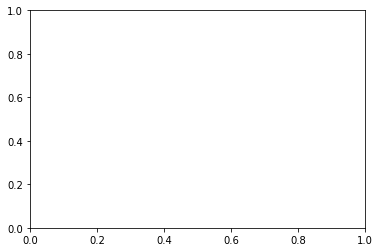

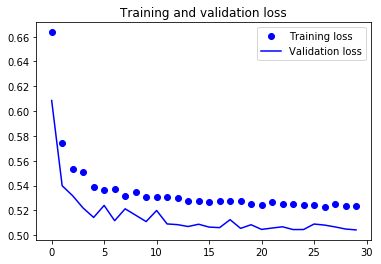

In [11]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = 30
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
x_test.shape


(1042, 320, 320, 3)

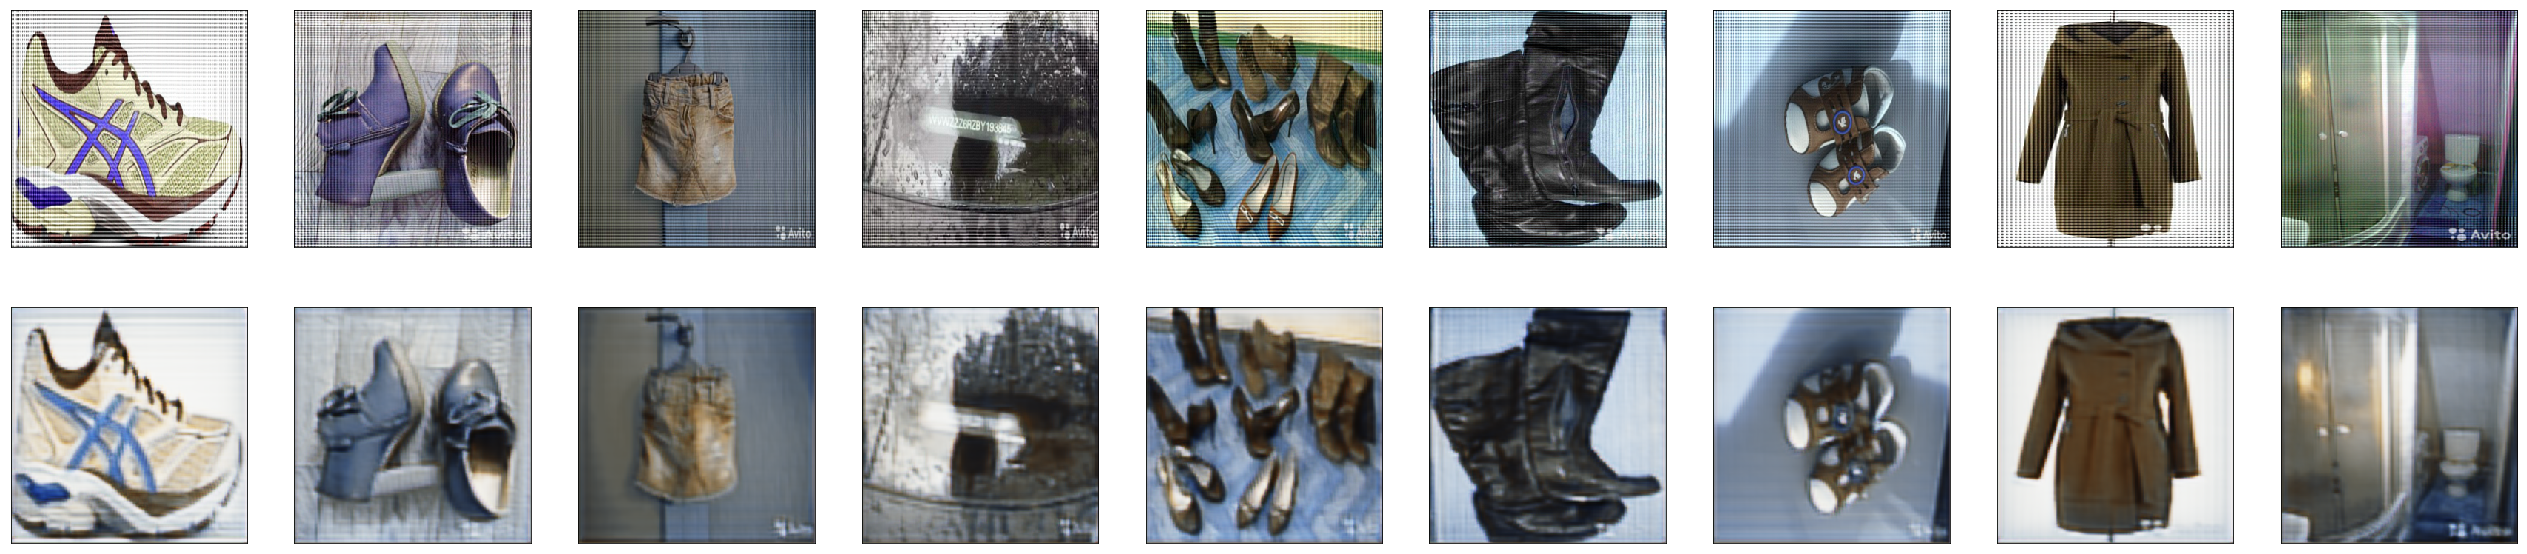

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(50, 10))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
decoded_imgs.shape

(1042, 320, 320, 3)

In [21]:
from os import path
for idx, image_matrix in enumerate(decoded_imgs):
        plt.imsave(path.join('reconstruction_avito/', '{}'.format(idx)), image_matrix)

In [22]:
autoencoder_train.model.save('conv_autoencode.h5') 